In [1]:
#IMPORTING ALL IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.feature_selection import SelectKBest,chi2,f_regression 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#READING THE CSV FILE
df=pd.read_csv("CrabAgePrediction.csv")
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


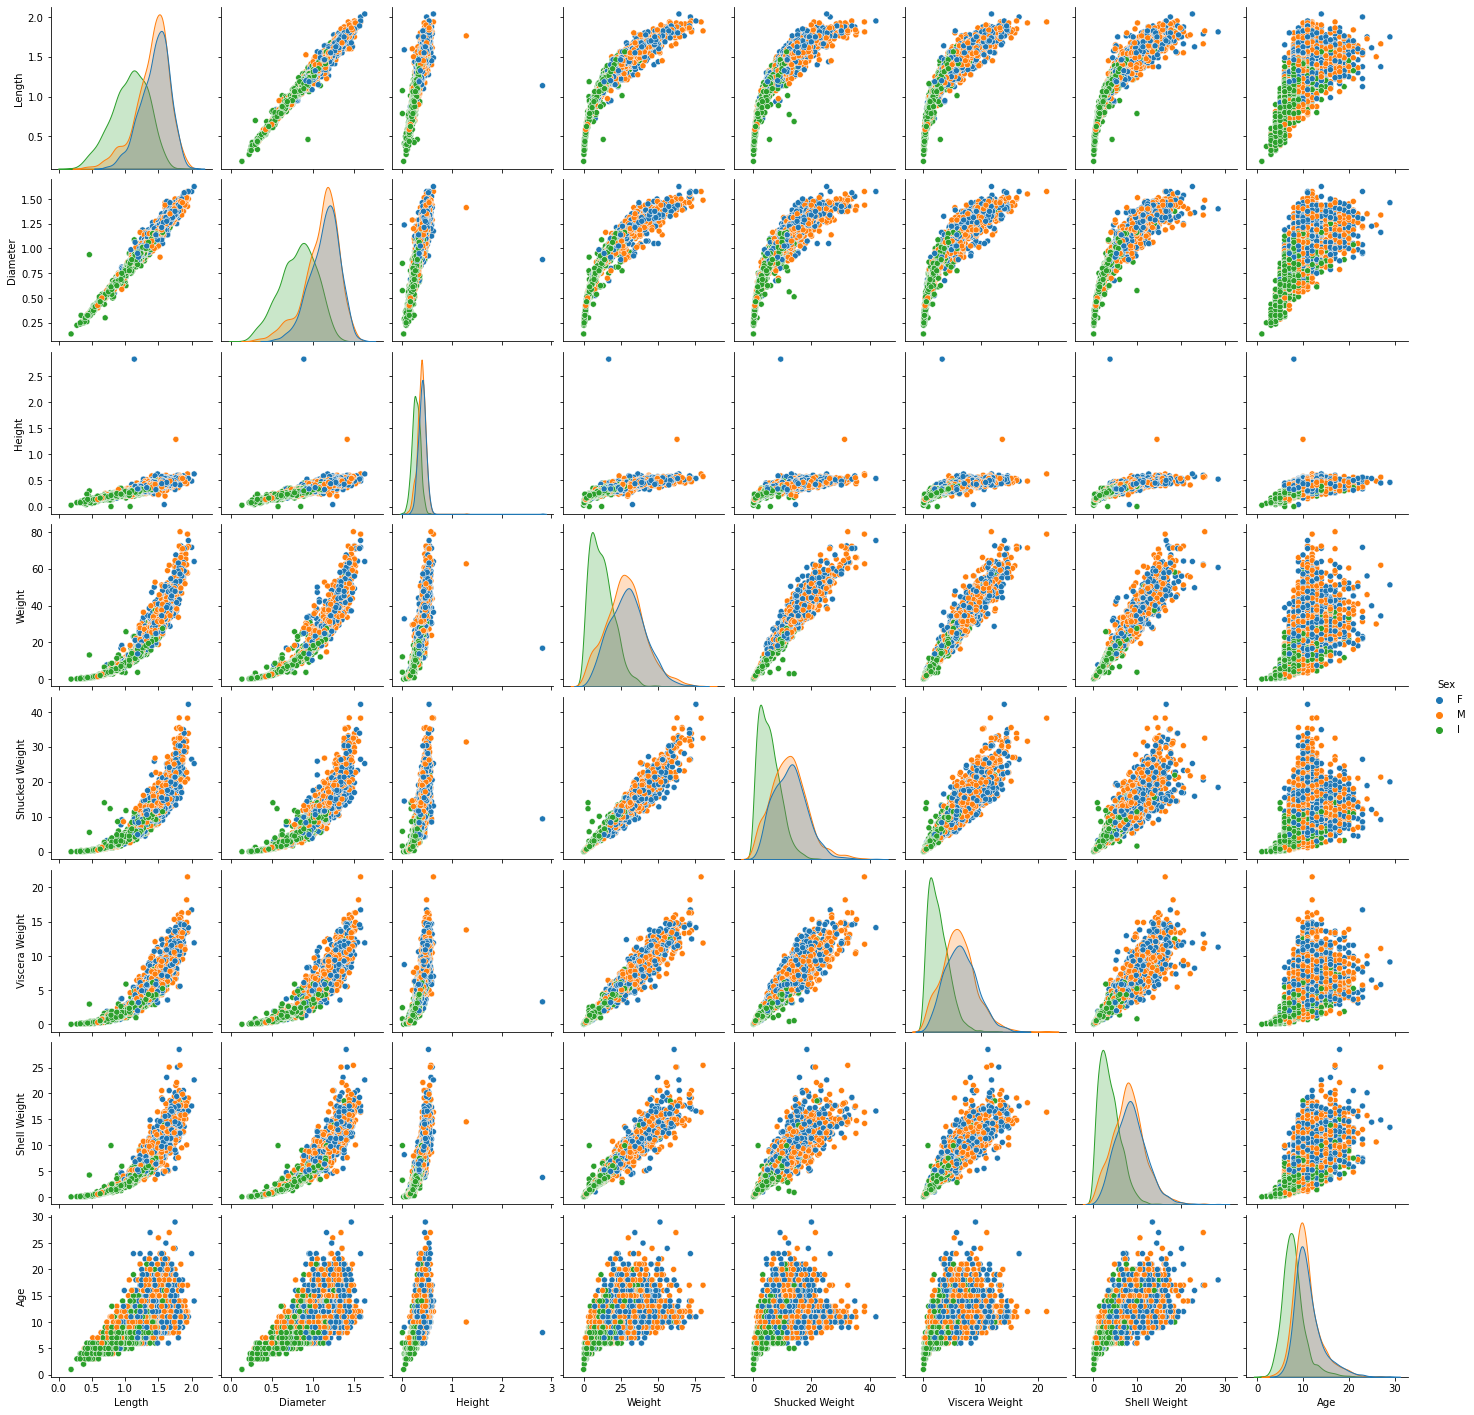

In [3]:
sns.pairplot(df,hue='Sex')

In [4]:
#CORRELATION TABLE
corr=df.corr()
corr


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823081,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.829532,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823081,0.829532,1.000000,0.814405,0.770961,0.793272,0.812290,0.551956
Weight,0.925374,0.925770,0.814405,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.770961,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793272,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.812290,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.551956,0.538819,0.418760,0.501328,0.625195,1.000000


<AxesSubplot:>

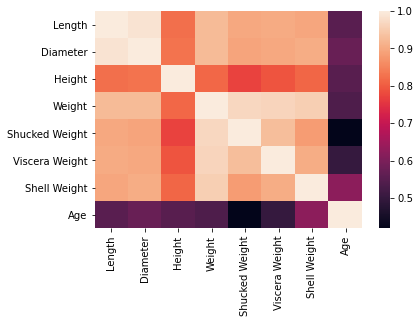

In [5]:
#HEATMAP
sns.heatmap(corr)

In [ ]:
# correlation tells us that we cannot get very accurate result and accuracy of the result will be around 50 percent as age is not very much dependent on independent variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [7]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [8]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Weight            2343
Shucked Weight    1482
Viscera Weight     867
Shell Weight       907
Age                 28
dtype: int64

In [9]:
df['Sex'].unique()

array(['F', 'M', 'I'], dtype=object)

In [10]:
#LABEL ENCODER
le=preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [11]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [12]:
X=df.iloc[ : , :8]


In [13]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181
1,2,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222
2,1,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076
3,0,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657
4,1,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970


In [14]:
y=df.iloc[: , -1:]

In [15]:
y.head()

,Age
0,9
1,6
2,6
3,10
4,6


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.5254226405132053


In [19]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=.00001, max_iter=10000,tol=0.01)
model.fit(X_train,y_train)
predictions=model.predict(X_test)


In [20]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.5254271736434024


In [21]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=.0001, max_iter=1000,tol=0.1)
model.fit(X_train,y_train)
predictions=model.predict(X_test)


In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predictions))

0.5254226850541868


In [23]:
model.score(X_test,y_test)

0.5254226850541868

In [24]:
model.score(X_train,y_train)

0.5261311290029733